<a href="https://colab.research.google.com/github/Praneeth-18/DataMining5/blob/main/Graph%20dataset/Graph_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
nodes = pd.read_csv("/content/drive/MyDrive/Datasets for CMPE 255/nodes.csv")
edges = pd.read_csv("/content/drive/MyDrive/Datasets for CMPE 255/edges.csv")

# Display the first few rows of each dataset
nodes.head(), edges.head()


(   Unnamed: 0   nodeId labels                 subject  \
 0           0    31336  Paper         Neural_Networks   
 1           1  1061127  Paper           Rule_Learning   
 2           2  1106406  Paper  Reinforcement_Learning   
 3           3    13195  Paper  Reinforcement_Learning   
 4           4    37879  Paper   Probabilistic_Methods   
 
                                             features  
 0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
 1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  
 2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
 3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
 4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  ,
    Unnamed: 0  sourceNodeId  targetNodeId relationshipType
 0           0            35          1033            CITES
 1           1            35        103482            CITES
 2           2            35        103515            CITES
 3           3            35       1050679            CITES
 4           

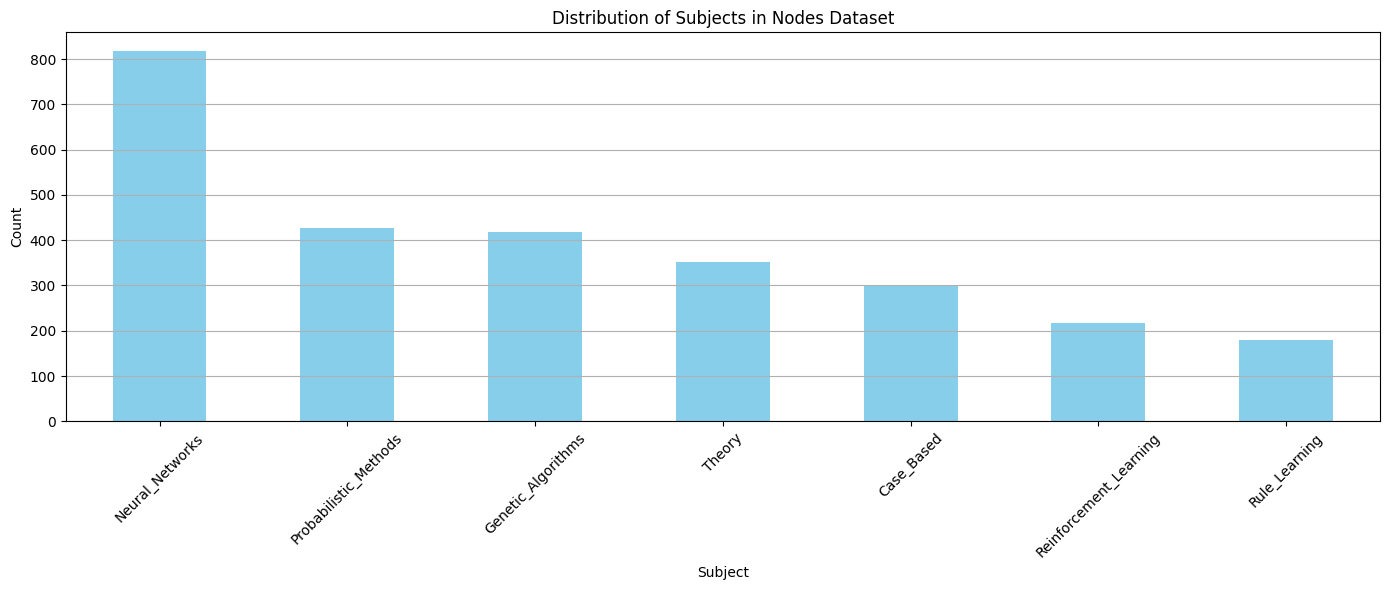

CITES    10556
Name: relationshipType, dtype: int64

In [4]:
import matplotlib.pyplot as plt

# Plot distribution of subjects in the nodes dataset
plt.figure(figsize=(14, 6))
nodes['subject'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Subjects in Nodes Dataset')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Display distribution of relationship types in the edges dataset
edges['relationshipType'].value_counts()


In [5]:
# Convert the string representation of the feature list to an actual list
nodes['features'] = nodes['features'].apply(eval)

# Check if all feature lists have the same length
feature_lengths = nodes['features'].apply(len)

# Display unique lengths of feature lists and their counts
feature_lengths.value_counts()


1433    2708
Name: features, dtype: int64

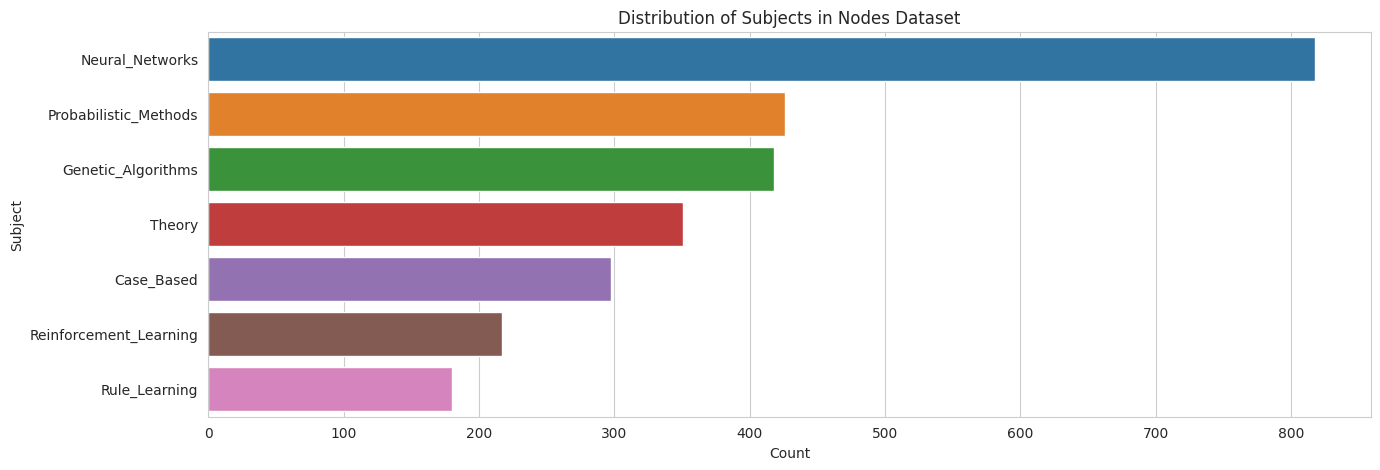

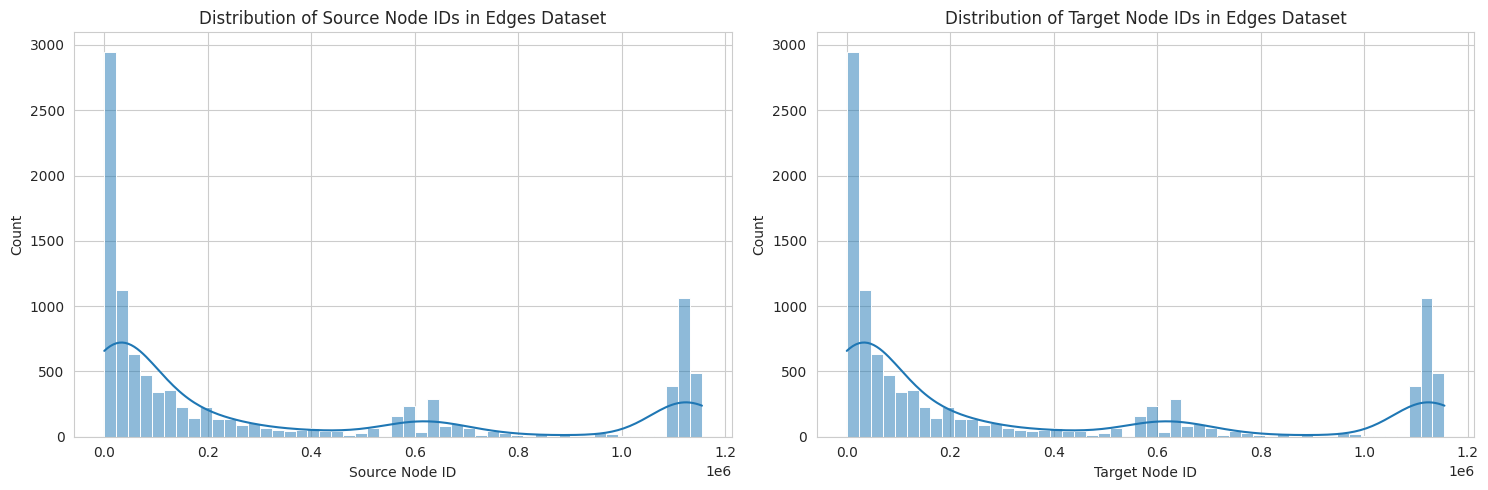

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the style
sns.set_style("whitegrid")

# Plotting the distribution of subjects in nodes dataset
plt.figure(figsize=(15, 5))
sns.countplot(data=nodes, y='subject', order=nodes['subject'].value_counts().index)
plt.title('Distribution of Subjects in Nodes Dataset')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

# Plotting the distribution of source and target node IDs in the edges dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=edges, x='sourceNodeId', ax=ax[0], bins=50, kde=True)
ax[0].set_title('Distribution of Source Node IDs in Edges Dataset')
ax[0].set_xlabel('Source Node ID')
ax[0].set_ylabel('Count')

sns.histplot(data=edges, x='targetNodeId', ax=ax[1], bins=50, kde=True)
ax[1].set_title('Distribution of Target Node IDs in Edges Dataset')
ax[1].set_xlabel('Target Node ID')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [7]:
# Checking for missing values in both datasets
missing_edges = edges.isnull().sum()
missing_nodes = nodes.isnull().sum()

missing_edges, missing_nodes


(Unnamed: 0          0
 sourceNodeId        0
 targetNodeId        0
 relationshipType    0
 dtype: int64,
 Unnamed: 0    0
 nodeId        0
 labels        0
 subject       0
 features      0
 dtype: int64)

In [10]:
# Dropping the 'Unnamed: 0' column from both datasets
edges.drop(columns=['Unnamed: 0'], inplace=True)
nodes.drop(columns=['Unnamed: 0'], inplace=True)

edges.head(), nodes.head()


(   sourceNodeId  targetNodeId relationshipType
 0            35          1033            CITES
 1            35        103482            CITES
 2            35        103515            CITES
 3            35       1050679            CITES
 4            35       1103960            CITES,
     nodeId labels                 subject  \
 0    31336  Paper         Neural_Networks   
 1  1061127  Paper           Rule_Learning   
 2  1106406  Paper  Reinforcement_Learning   
 3    13195  Paper  Reinforcement_Learning   
 4    37879  Paper   Probabilistic_Methods   
 
                                             features  
 0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
 1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...  
 2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
 3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
 4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  )

# **Clustering**

In [16]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Taking a much smaller sample of the data (e.g., 100 records)
small_sample_size = 100
nodes_small_sample = nodes.sample(n=small_sample_size, random_state=42)
X_small_sample = np.array(nodes_small_sample['features'].apply(lambda x: x[:50]).tolist())  # Further reducing the feature set

# Applying KMeans clustering to the small sampled data
kmeans_simple_small = KMeans(n_clusters=7, random_state=42, n_init=10).fit(X_small_sample)
clusters_small = kmeans_simple_small.labels_

# Distribution of nodes across clusters for the small sample
cluster_distribution_small = pd.Series(clusters_small).value_counts().sort_index()

cluster_distribution_small


0     1
1     6
2    20
3     8
4    56
5     7
6     2
dtype: int64

# **Anomaly Detection**

In [17]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest to the small sample data
iso_forest = IsolationForest(contamination=0.1, random_state=42)  # Assuming roughly 10% of the data could be anomalies
anomalies = iso_forest.fit_predict(X_small_sample)

# Convert the labels (1 for normal, -1 for anomaly)
anomaly_labels = ["anomaly" if label == -1 else "normal" for label in anomalies]

# Count of normal vs anomalies
anomaly_counts = pd.Series(anomaly_labels).value_counts()

anomaly_counts


normal     90
anomaly    10
dtype: int64

# **Modeling**

In [18]:
pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=08df4357d55e50dad22328d29ed8f809524a0aeec6a5c017d02b1d03640e4956
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [20]:
import numpy as np
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Sample the data (use a larger sample or the entire dataset if your machine has enough memory)
sample_size = 100
nodes_sample = nodes.sample(n=sample_size, random_state=42)

# Prepare the feature matrix and target labels (cluster labels in this example)
X = np.array(nodes_sample['features'].apply(lambda x: x[:50]).tolist())  # Convert to NumPy array
y = KMeans(n_clusters=7, random_state=42, n_init=10).fit_predict(X)  # Using cluster labels as classes for demonstration

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run TPOT
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the model
print(f"Test set accuracy: {tpot.score(X_test, y_test)}")

# Export the best pipeline
tpot.export('tpot_exported_pipeline.py')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.9875

Generation 3 - Current best internal CV score: 0.9875

Generation 4 - Current best internal CV score: 0.9875

Generation 5 - Current best internal CV score: 0.9875

Best pipeline: SGDClassifier(input_matrix, alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.25, learning_rate=constant, loss=modified_huber, penalty=elasticnet, power_t=0.0)
Test set accuracy: 0.95
